In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = None

df = pd.read_csv("houses.csv")

df

,Unnamed: 0,House,SquareFootage,Price
0,0,1,1000,100000
1,1,2,1100,120000
2,2,3,1125,130000
3,3,4,1200,150000
4,4,5,1500,200000
5,5,6,1800,250000
6,6,7,2200,300000
7,7,8,1350,175000
8,8,9,2000,225000
9,9,10,1750,210000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     25 non-null     int64
 1   House          25 non-null     int64
 2   SquareFootage  25 non-null     int64
 3   Price          25 non-null     int64
dtypes: int64(4)
memory usage: 932.0 bytes


In [3]:
df.describe()

,Unnamed: 0,House,SquareFootage,Price
count,25.000000,25.000000,25.000000,25.000000
mean,12.000000,13.000000,1657.000000,203000.000000
std,7.359801,7.359801,405.914605,59721.576224
min,0.000000,1.000000,1000.000000,100000.000000
25%,6.000000,7.000000,1350.000000,155000.000000
50%,12.000000,13.000000,1650.000000,200000.000000
75%,18.000000,19.000000,1950.000000,240000.000000
max,24.000000,25.000000,2500.000000,325000.000000


In [4]:
df = df.drop('House', axis=1)
df.head()

,Unnamed: 0,SquareFootage,Price
0,0,1000,100000
1,1,1100,120000
2,2,1125,130000
3,3,1200,150000
4,4,1500,200000


In [5]:
from sklearn.model_selection import train_test_split

x = df['SquareFootage'].values.reshape(-1, 1)
y = df['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

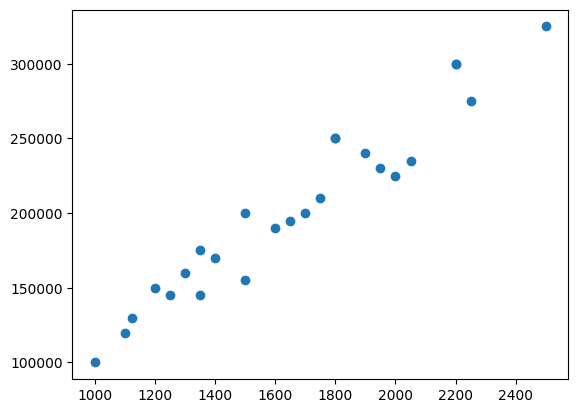

In [6]:
plt.scatter(x, y)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

score = model.score(x, y)
print('model score:', score)

model score: 0.9290632173028548


In [8]:
x

array([[1000],
       [1100],
       [1125],
       [1200],
       [1500],
       [1800],
       [2200],
       [1350],
       [2000],
       [1750],
       [1700],
       [1650],
       [1900],
       [1300],
       [2500],
       [1500],
       [1400],
       [2050],
       [2250],
       [1600],
       [1950],
       [2200],
       [1800],
       [1350],
       [1250]], dtype=int64)

In [9]:
y

array([100000, 120000, 130000, 150000, 200000, 250000, 300000, 175000,
       225000, 210000, 200000, 195000, 240000, 160000, 325000, 155000,
       170000, 235000, 275000, 190000, 230000, 300000, 250000, 145000,
       145000], dtype=int64)

In [10]:
x_test
y_pred

array([254120.14154944, 169527.3886468 , 113132.22004504, 162477.99257158,
       204774.3690229 ])

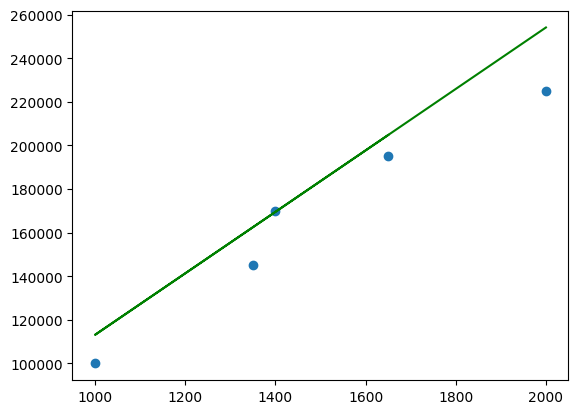

In [11]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'g')
plt.show()